# Algoritmos genéticos

## Importaciones

In [59]:
!pip install deap
!pip install tqdm

In [60]:
import random
from typing import Callable

import matplotlib.patches as patches
import matplotlib.pyplot as plt
import numpy as np
from deap import base, creator, tools
from matplotlib import pyplot as plt
from tqdm import tqdm

## Inicialización

In [61]:
SEED = 27 # Valor de seed aleatoria
FIL = 8 # num de files
COL = 8 # num de columns
START = 0
END = FIL*COL
CXPB = 0.5 # Probabilidad de cruce
MUTPB = 0.2 # Probabilidad de mutabilidad
POP_LEN = 10 # Tamaño de la poblacion
GENS = 1000 # Número máximo de iteraciones
INDP = 0.05 # Probabilidad de que un determinado indice se intercambie
random.seed(SEED)

## Funciones auxiliares

In [62]:
def draw_chessboard(solution: list[int]):
    """Dibuja un tablero y coloca los números de la lista (tablero aplanado) en las casillas."""
    n = int(len(solution) ** 0.5)
    assert n * n == len(solution), "La longitud de la solución debe ser un cuadrado perfecto"
    fig, ax = plt.subplots(figsize=(n, n))
    colors = ['#f0d9b5', '#b58863']

    def get_fontsize(n):
        if n <= 8:
            return 28
        elif n <= 12:
            return 22
        elif n <= 16:
            return 18
        else:
            return 14

    fontsize = get_fontsize(n)

    # dibujamos tablero
    for row in range(n):
        for col in range(n):
            color = colors[(row + col + 1) % 2]
            square = patches.Rectangle((col, row), 1, 1, facecolor=color)
            ax.add_patch(square)

    # dibujamos los números de la lista en cada casilla
    for idx, value in enumerate(solution):
        row = idx // n
        col = idx % n
        # Ajusta el desplazamiento horizontal para centrar mejor los números de 2 dígitos
        text_str = str(value)
        ax.text(col + 0.5, row + 0.5, text_str, fontsize=fontsize,
                ha='center', va='center', color='black', fontweight='bold')

    ax.set_xlim(0, n)
    ax.set_ylim(0, n)
    ax.invert_yaxis()
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_aspect('equal')
    plt.box(False)
    plt.show()

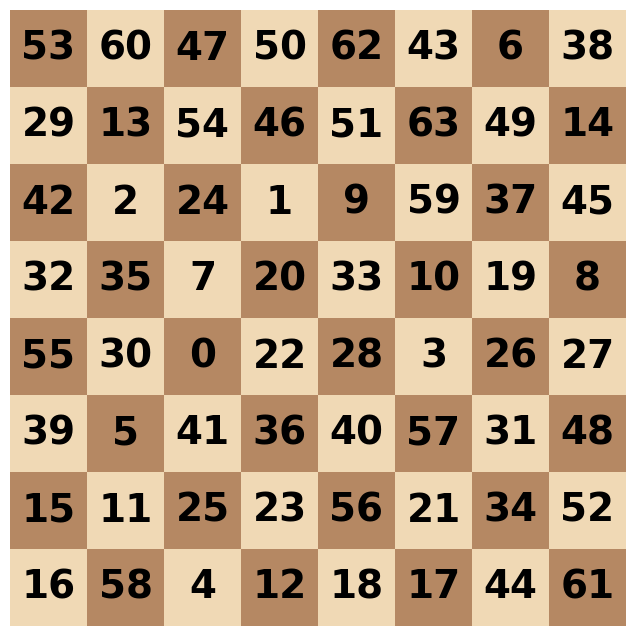

[53,
 60,
 47,
 50,
 62,
 43,
 6,
 38,
 29,
 13,
 54,
 46,
 51,
 63,
 49,
 14,
 42,
 2,
 24,
 1,
 9,
 59,
 37,
 45,
 32,
 35,
 7,
 20,
 33,
 10,
 19,
 8,
 55,
 30,
 0,
 22,
 28,
 3,
 26,
 27,
 39,
 5,
 41,
 36,
 40,
 57,
 31,
 48,
 15,
 11,
 25,
 23,
 56,
 21,
 34,
 52,
 16,
 58,
 4,
 12,
 18,
 17,
 44,
 61]

In [63]:
import random
solution = list(range(FIL*COL))
random.shuffle(solution)

draw_chessboard(solution)
solution

In [54]:
creator.create("FitnessMax", base.Fitness, weights=(1.0,))
creator.create("Individual", list, fitness=creator.FitnessMax)

disponible = []
def restriction(*args, **kwargs):
  global disponible
  if not disponible:
    disponible.extend(range(FIL*COL))
    disponible = random.sample(disponible, FIL*COL)

  return disponible.pop(0)

toolbox = base.Toolbox()
# Generador de atributos
toolbox.register("attr_bool", restriction, 0, FIL-1)
# Inicializamos estructuras
toolbox.register("individual", tools.initRepeat, creator.Individual,
    toolbox.attr_bool, FIL)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

c:\Users\Gonzalo Ramos\AppData\Local\Programs\Python\Python313\Lib\site-packages\deap\creator.py:185: RuntimeWarning: A class named 'FitnessMax' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
c:\Users\Gonzalo Ramos\AppData\Local\Programs\Python\Python313\Lib\site-packages\deap\creator.py:185: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


In [72]:
def fitness(individual: list[int]):
    """Función para evaluar el fitness de los individuos"""
    current_pos = 0
    path_len = 0
    while current_pos < FIL*COL - 1:
        pos = individual.index(current_pos)
        next_pos = individual.index(current_pos+1) 
        print("comparing: ", pos, next_pos)
        diff = abs(pos - next_pos)
        print("diff: ", diff)
        print(f"conditions: {(2*FIL + 1)=}, {(2*FIL - 1)=}, {(2 + FIL)=}, {(2 - FIL)=}")
        if diff == 2*FIL + 1 or diff == 2*FIL - 1 or diff == 2 + FIL or diff == FIL - 2:
            path_len += 1
        else: # TODO: fitness del inicio a fallo vs total combinaciones validas
            # break
            pass

        current_pos += 1

    return path_len


toolbox.register("evaluate", fitness)
toolbox.register("mate", tools.cxTwoPoint)
toolbox.register("mutate", tools.mutShuffleIndexes, indpb=INDP)
toolbox.register("select", tools.selTournament, tournsize=3)

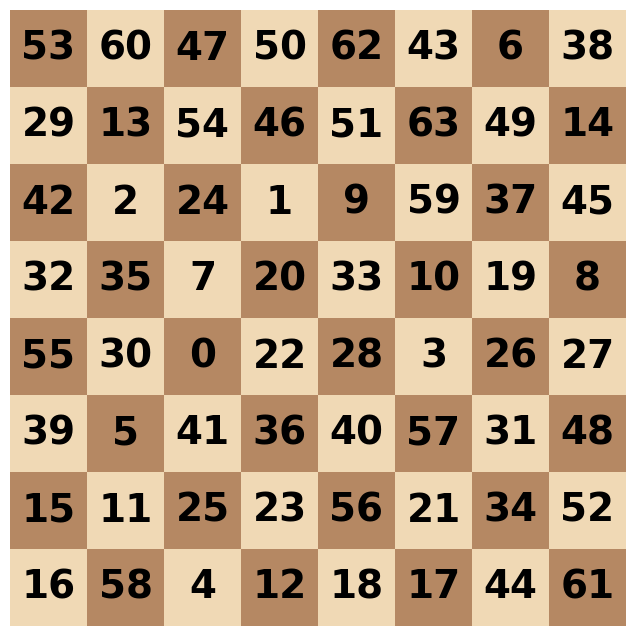

comparing:  34 19
diff:  15
conditions: (2*FIL + 1)=17, (2*FIL - 1)=15, (2 + FIL)=10, (2 - FIL)=-6
comparing:  19 17
diff:  2
conditions: (2*FIL + 1)=17, (2*FIL - 1)=15, (2 + FIL)=10, (2 - FIL)=-6
comparing:  17 37
diff:  20
conditions: (2*FIL + 1)=17, (2*FIL - 1)=15, (2 + FIL)=10, (2 - FIL)=-6
comparing:  37 58
diff:  21
conditions: (2*FIL + 1)=17, (2*FIL - 1)=15, (2 + FIL)=10, (2 - FIL)=-6
comparing:  58 41
diff:  17
conditions: (2*FIL + 1)=17, (2*FIL - 1)=15, (2 + FIL)=10, (2 - FIL)=-6
comparing:  41 6
diff:  35
conditions: (2*FIL + 1)=17, (2*FIL - 1)=15, (2 + FIL)=10, (2 - FIL)=-6
comparing:  6 26
diff:  20
conditions: (2*FIL + 1)=17, (2*FIL - 1)=15, (2 + FIL)=10, (2 - FIL)=-6
comparing:  26 31
diff:  5
conditions: (2*FIL + 1)=17, (2*FIL - 1)=15, (2 + FIL)=10, (2 - FIL)=-6
comparing:  31 20
diff:  11
conditions: (2*FIL + 1)=17, (2*FIL - 1)=15, (2 + FIL)=10, (2 - FIL)=-6
comparing:  20 29
diff:  9
conditions: (2*FIL + 1)=17, (2*FIL - 1)=15, (2 + FIL)=10, (2 - FIL)=-6
comparing:  29 

6

In [74]:
cosa = [53,
 60,
 47,
 50,
 62,
 43,
 6,
 38,
 29,
 13,
 54,
 46,
 51,
 63,
 49,
 14,
 42,
 2,
 24,
 1,
 9,
 59,
 37,
 45,
 32,
 35,
 7,
 20,
 33,
 10,
 19,
 8,
 55,
 30,
 0,
 22,
 28,
 3,
 26,
 27,
 39,
 5,
 41,
 36,
 40,
 57,
 31,
 48,
 15,
 11,
 25,
 23,
 56,
 21,
 34,
 52,
 16,
 58,
 4,
 12,
 18,
 17,
 44,
 61]

draw_chessboard(cosa)
fitness(cosa)

# Función de algoritmo genético.

In [10]:
def execute_genetic_algorithm(toolbox: base.Toolbox, pop_size: int, num_generations: int, CXPB: float, MUTPB: float, debug: bool=False) -> int:
    pop = toolbox.population(n=pop_size)
    fitnesses = list(map(toolbox.evaluate, pop))
    for ind, fit in zip(pop, fitnesses):
        ind.fitness.values = fit

    fits = [ind.fitness.values[0] for ind in pop]

    converged = False
    iter = tqdm(range(num_generations), desc=f"Max: {max(fits):.2f} | Avg: {sum(fits)/len(fits):.2f} | Min: {min(fits):.2f}")
    for num_it in iter:
        iter.desc = f"Max: {max(fits):.2f} | Avg: {sum(fits)/len(fits):.2f} | Min: {min(fits):.2f}"
        if debug:
          pop.sort(key=lambda ind: ind.fitness.values, reverse=True)
          # Mostramos los mejores individuos de la población para cada iteración (si debug está activado)
          draw_advanced_chessboards_arrows(pop[:6], len(pop[:6]))

        if max(fits) >= 1.0:
          # Si encontramos solución hemos convergido.
            converged = True
            break


        offspring = toolbox.select(pop, len(pop))
        offspring = list(map(toolbox.clone, offspring))

        for child1, child2 in zip(offspring[::2], offspring[1::2]):
          # Por cada par de individuos comprobamos si los cruzamos
            if random.random() < CXPB:
                toolbox.mate(child1, child2)
                del child1.fitness.values
                del child2.fitness.values

        for mutant in offspring:
          # Comprobamos por cada individuo si debe mutar
            if random.random() < MUTPB:
                toolbox.mutate(mutant)
                del mutant.fitness.values

        invalid_ind = [ind for ind in offspring if not ind.fitness.valid]
        fitnesses = map(toolbox.evaluate, invalid_ind)
        # Reevaluamos los individuos no validos
        for ind, fit in zip(invalid_ind, fitnesses):
            ind.fitness.values = fit

        pop[:] = offspring

        fits = [ind.fitness.values[0] for ind in pop]

    return num_it, pop, converged

Ejecutamos el algoritmo con una población inicial de 25 individuos, y un máximo de 100 iteraciones.


In [ ]:
execute_genetic_algorithm(toolbox, 25, 100, CXPB, MUTPB, True);

## Experimentamos variando la probabilidad de mutación con el índice

In [12]:
def experiment_varying_indpb(toolbox: base.Toolbox, pop_size: int, num_generations: int, cxpb: float, mutpb: float, num_runs: int = 5):
    indpb_values = np.linspace(0.0, 1.0, 20)
    results = []

    for indpb in indpb_values:
        # Registramos la mutacion con el nuevo valor de indpb
        toolbox.unregister("mutate")
        toolbox.register("mutate", tools.mutShuffleIndexes, indpb=indpb)

        min_fits_list = []
        max_fits_list = []
        mean_list = []
        std_list = []
        num_it_list = []

        for _ in range(num_runs):
            num_it, pop, converged = execute_genetic_algorithm(toolbox, pop_size, num_generations, cxpb, mutpb)
            fits = [ind.fitness.values[0] for ind in pop]
            length = len(pop)
            mean = sum(fits) / length
            sum2 = sum(x*x for x in fits)
            std = abs(sum2 / length - mean**2)**0.5

            min_fits_list.append(min(fits))
            max_fits_list.append(max(fits))
            mean_list.append(mean)
            std_list.append(std)
            num_it_list.append(num_it)

        # Calculamos medias
        avg_min_fits = np.mean(min_fits_list)
        avg_max_fits = np.mean(max_fits_list)
        avg_mean = np.mean(mean_list)
        avg_std = np.mean(std_list)
        avg_num_it = np.mean(num_it_list)

        stats = (avg_min_fits, avg_max_fits, avg_mean, avg_std, avg_num_it)
        results.append((indpb, stats))

    return results

In [13]:
results = experiment_varying_indpb(toolbox, pop_size=POP_LEN, num_generations=GENS, cxpb=CXPB, mutpb=MUTPB, num_runs=5)

Max: 0.33 | Avg: 0.33 | Min: 0.33: 100%|██████████| 1000/1000 [00:00<00:00, 5770.64it/s]
Max: 0.50 | Avg: 0.50 | Min: 0.50: 100%|██████████| 1000/1000 [00:00<00:00, 7011.46it/s]
Max: 0.25 | Avg: 0.25 | Min: 0.25: 100%|██████████| 1000/1000 [00:00<00:00, 6761.80it/s]
Max: 0.33 | Avg: 0.33 | Min: 0.33: 100%|██████████| 1000/1000 [00:00<00:00, 6674.76it/s]
Max: 0.25 | Avg: 0.25 | Min: 0.25: 100%|██████████| 1000/1000 [00:00<00:00, 6561.87it/s]
Max: 1.00 | Avg: 0.51 | Min: 0.14:   7%|▋         | 67/1000 [00:00<00:00, 6304.11it/s]
Max: 1.00 | Avg: 0.55 | Min: 0.50:   1%|          | 6/1000 [00:00<00:11, 87.94it/s]
Max: 1.00 | Avg: 0.53 | Min: 0.33:  66%|██████▌   | 657/1000 [00:00<00:00, 6847.49it/s]
Max: 1.00 | Avg: 0.55 | Min: 0.50:  35%|███▌      | 351/1000 [00:00<00:00, 6238.72it/s]
Max: 1.00 | Avg: 0.52 | Min: 0.17:  78%|███████▊  | 777/1000 [00:00<00:00, 6649.24it/s]
Max: 1.00 | Avg: 0.49 | Min: 0.17:  16%|█▌        | 157/1000 [00:00<00:00, 5761.61it/s]
Max: 1.00 | Avg: 0.48 | Min: 0.2

In [14]:
def plot_indpb_results(results):
    indpb_vals = [r[0] for r in results]
    min_vals   = [r[1][0] for r in results]
    max_vals   = [r[1][1] for r in results]
    mean_vals  = [r[1][2] for r in results]
    std_vals   = [r[1][3] for r in results]
    num_it_vals = [r[1][4] for r in results]

    plt.figure(figsize=(12, 8))

    # Subplot 1 - Number of Iterations
    plt.subplot(2, 2, 1)
    plt.plot(indpb_vals, num_it_vals, marker='o')
    plt.title("Iterations to Converge vs indpb")
    plt.xlabel("indpb")
    plt.ylabel("Number of Iterations")
    plt.grid(True)

    # Encontramos el indpb con menor número de iteraciones
    min_it = min(num_it_vals)
    min_index = num_it_vals.index(min_it)
    x_val = indpb_vals[min_index]

    # Línea vertical para el indpb
    plt.axvline(x=x_val, color='red', linestyle='--')
    y_lower, y_upper = plt.ylim()
    plt.text(x_val, y_lower - 0.1 * (y_upper - y_lower),
             f"{x_val:.2f}",
             color='red', ha='center', va='top')

    # Linea horizontal para el numero mínimo de iteraciones
    plt.axhline(y=min_it, color='red', linestyle='--')
    plt.text(min(indpb_vals), min_it,
             f"{int(min_it)}", color='red', ha='left', va='bottom')

    # Subplot 2 - Mean Fitness
    plt.subplot(2, 2, 2)
    plt.plot(indpb_vals, mean_vals, marker='o', color='orange')
    plt.title("Mean Fitness vs indpb")
    plt.xlabel("indpb")
    plt.ylabel("Mean Fitness")
    plt.grid(True)

    # Encontrar el indpb con la mayor media de fitness
    max_mean = max(mean_vals)
    max_index = mean_vals.index(max_mean)
    x_val = indpb_vals[max_index]

    # Línea vertical para el indpb
    plt.axvline(x=x_val, color='red', linestyle='--')
    y_lower, y_upper = plt.ylim()
    plt.text(x_val, y_lower - 0.1 * (y_upper - y_lower),
             f"{x_val:.2f}", color='red', ha='center', va='top')

    # Linea horizontal para el máximo de las medias de fitness
    plt.axhline(y=max_mean, color='red', linestyle='--')
    plt.text(min(indpb_vals), max_mean,
             f"{max_mean:.2f}", color='red', ha='left', va='bottom')

    # Subplot 3 - Min Fitness
    plt.subplot(2, 2, 3)
    plt.plot(indpb_vals, min_vals, marker='o', color='green')
    plt.title("Min Fitness vs indpb")
    plt.xlabel("indpb")
    plt.ylabel("Min Fitness")
    plt.grid(True)

    # Encontramos el indpb con el mayor mínimo de fitness
    max_min = max(min_vals)
    max_index = min_vals.index(max_min)
    x_val = indpb_vals[max_index]

    # Línea vertical para el indpb
    plt.axvline(x=x_val, color='red', linestyle='--')
    y_lower, y_upper = plt.ylim()
    plt.text(x_val, y_lower - 0.1 * (y_upper - y_lower),
             f"{x_val:.2f}",
             color='red', ha='center', va='top')

    # Linea horizontal para el mayor valor del mínimo de fitness
    plt.axhline(y=max_min, color='red', linestyle='--')
    plt.text(min(indpb_vals), max_min,
             f"{max_min:.2f}", color='red', ha='left', va='bottom')

    # Subplot 4 - Std Dev
    plt.subplot(2, 2, 4)
    plt.plot(indpb_vals, std_vals, marker='o', color='red')
    plt.title("Std Dev of Fitness vs indpb")
    plt.xlabel("indpb")
    plt.ylabel("Standard Deviation")
    plt.grid(True)

    plt.tight_layout()
    plt.show()

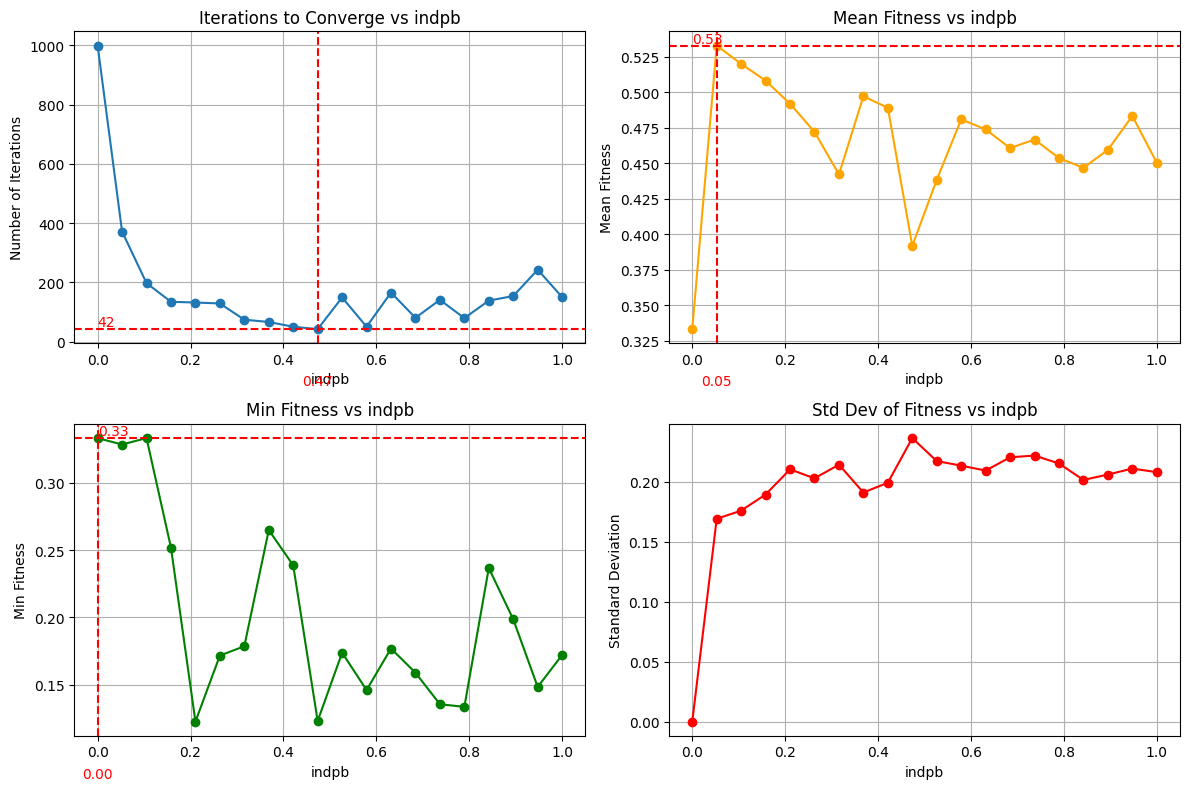

In [15]:
plot_indpb_results(results)

## Experimentamos cambiando el método de selección

In [16]:
def experiment_varying_selection(toolbox: base.Toolbox, pop_size: int, num_generations: int, cxpb: float, mutpb: float, num_runs: int = 5):
    # Métodos de selección
    selection_methods = {
        "Random": tools.selRandom,
        "Roulette": tools.selRoulette,
        "Tournament": lambda individuals, k: tools.selTournament(individuals, k, tournsize=3),
        "Best": tools.selBest,
        "Worst": tools.selWorst
    }

    results = []
    # Iteramos con todos los métodos para obtener información
    for name, method in selection_methods.items():
        toolbox.unregister("select")
        toolbox.register("select", method)

        print(f"\nRunning selection method: {name}")
        min_fits_list = []
        max_fits_list = []
        mean_list = []
        std_list = []
        num_it_list = []

        for _ in range(num_runs):
            num_it, pop, converged = execute_genetic_algorithm(toolbox, pop_size, num_generations, cxpb, mutpb)
            fits = [ind.fitness.values[0] for ind in pop]
            length = len(pop)
            mean = sum(fits) / length
            sum2 = sum(x*x for x in fits)
            std = abs(sum2 / length - mean**2)**0.5

            min_fits_list.append(min(fits))
            max_fits_list.append(max(fits))
            mean_list.append(mean)
            std_list.append(std)
            num_it_list.append(num_it)

        # Calculamos medias
        avg_min_fits = np.mean(min_fits_list)
        avg_max_fits = np.mean(max_fits_list)
        avg_mean = np.mean(mean_list)
        avg_std = np.mean(std_list)
        avg_num_it = np.mean(num_it_list)

        stats = (avg_min_fits, avg_max_fits, avg_mean, avg_std, avg_num_it)
        results.append((name, stats))

    return results

In [17]:
def plot_selection_results(results):
    """ Mostramos las gráficas con los resultados. """
    names     = [r[0] for r in results]
    min_vals  = [r[1][0] for r in results]
    max_vals  = [r[1][1] for r in results]
    mean_vals = [r[1][2] for r in results]
    std_vals  = [r[1][3] for r in results]
    num_it_vals = [r[1][4] for r in results]

    x = np.arange(len(names))

    plt.figure(figsize=(12, 8))

    # Subplot 1 - Number of Iterations
    plt.subplot(2, 2, 1)
    plt.bar(x, num_it_vals, color='skyblue')
    plt.xticks(x, names)
    plt.title("Iterations to Converge por método de selección")
    plt.ylabel("Number of Iterations")


    # Señalamos el método con el menor número de iteraciones
    min_it = min(num_it_vals)
    min_index = num_it_vals.index(min_it)
    plt.text(min_index, min_it, f"{int(min_it)}", color='red', ha='center', va='bottom')

    # Subplot 2 - Mean Fitness
    plt.subplot(2, 2, 2)
    plt.bar(x, mean_vals, color='orange')
    plt.xticks(x, names)
    plt.title("Mean Fitness por método de selección")
    plt.ylabel("Mean Fitness")

    # Señalamos el método con el mayor valor de fitness medio
    max_mean = max(mean_vals)
    max_index = mean_vals.index(max_mean)
    plt.text(max_index, max_mean, f"{max_mean:.2f}", color='red', ha='center', va='bottom')

    # Subplot 3 - Min Fitness
    plt.subplot(2, 2, 3)
    plt.bar(x, min_vals, color='green')
    plt.xticks(x, names)
    plt.title("Min Fitness por método de selección")
    plt.ylabel("Min Fitness")

    # Señalamos el método con el mayor valor de fitness mínimo
    max_min = max(min_vals)
    max_index = min_vals.index(max_min)
    plt.text(max_index, max_min, f"{max_min:.2f}", color='red', ha='center', va='bottom')

    # Subplot 4 - Std Dev
    plt.subplot(2, 2, 4)
    plt.bar(x, std_vals, color='red')
    plt.xticks(x, names)
    plt.title("Std Dev por método de selección")
    plt.ylabel("Standard Deviation")

    plt.tight_layout()
    plt.show()

In [18]:
results = experiment_varying_selection(toolbox, POP_LEN, GENS, CXPB, MUTPB, num_runs=5)


Running selection method: Random


Max: 1.00 | Avg: 0.31 | Min: 0.11:  51%|█████     | 508/1000 [00:00<00:00, 7134.03it/s]
Max: 1.00 | Avg: 0.27 | Min: 0.12:   9%|▉         | 90/1000 [00:00<00:00, 6949.71it/s]
Max: 1.00 | Avg: 0.23 | Min: 0.11:   4%|▎         | 36/1000 [00:00<00:00, 5508.55it/s]
Max: 1.00 | Avg: 0.25 | Min: 0.14:  39%|███▉      | 391/1000 [00:00<00:00, 6969.50it/s]
Max: 1.00 | Avg: 0.27 | Min: 0.12:   6%|▌         | 55/1000 [00:00<00:00, 7034.20it/s]



Running selection method: Roulette


Max: 1.00 | Avg: 0.40 | Min: 0.11:  20%|█▉        | 197/1000 [00:00<00:00, 6465.90it/s]
Max: 1.00 | Avg: 0.44 | Min: 0.08:  18%|█▊        | 183/1000 [00:00<00:00, 6095.40it/s]
Max: 1.00 | Avg: 0.37 | Min: 0.14:   4%|▎         | 36/1000 [00:00<00:00, 5456.20it/s]
Max: 1.00 | Avg: 0.39 | Min: 0.06:  78%|███████▊  | 783/1000 [00:00<00:00, 5792.01it/s]
Max: 1.00 | Avg: 0.45 | Min: 0.09:  47%|████▋     | 469/1000 [00:00<00:00, 6113.29it/s]



Running selection method: Tournament


Max: 1.00 | Avg: 0.41 | Min: 0.10:  12%|█▏        | 121/1000 [00:00<00:00, 6414.28it/s]
Max: 1.00 | Avg: 0.46 | Min: 0.17:   8%|▊         | 81/1000 [00:00<00:00, 6878.69it/s]
Max: 1.00 | Avg: 0.53 | Min: 0.33:   9%|▉         | 89/1000 [00:00<00:00, 6255.64it/s]
Max: 1.00 | Avg: 0.42 | Min: 0.25:   2%|▏         | 23/1000 [00:00<00:00, 6489.24it/s]
Max: 1.00 | Avg: 0.40 | Min: 0.33:   2%|▏         | 20/1000 [00:00<00:00, 5208.70it/s]



Running selection method: Best


Max: 1.00 | Avg: 0.29 | Min: 0.10:  84%|████████▍ | 839/1000 [00:00<00:00, 6677.52it/s]
Max: 1.00 | Avg: 0.29 | Min: 0.14:  40%|███▉      | 395/1000 [00:00<00:00, 7177.64it/s]
Max: 1.00 | Avg: 0.27 | Min: 0.08:   1%|          | 8/1000 [00:00<00:00, 5574.75it/s]
Max: 1.00 | Avg: 0.29 | Min: 0.12:   4%|▍         | 41/1000 [00:00<00:00, 6193.64it/s]
Max: 1.00 | Avg: 0.27 | Min: 0.11:  11%|█▏        | 113/1000 [00:00<00:00, 7036.90it/s]



Running selection method: Worst


Max: 1.00 | Avg: 0.36 | Min: 0.12:  18%|█▊        | 182/1000 [00:00<00:00, 6633.04it/s]
Max: 1.00 | Avg: 0.28 | Min: 0.08:  18%|█▊        | 183/1000 [00:00<00:00, 7195.22it/s]
Max: 1.00 | Avg: 0.26 | Min: 0.08:  28%|██▊       | 276/1000 [00:00<00:00, 6975.05it/s]
Max: 1.00 | Avg: 0.31 | Min: 0.11:  47%|████▋     | 470/1000 [00:00<00:00, 7157.78it/s]
Max: 1.00 | Avg: 0.27 | Min: 0.12:  35%|███▍      | 348/1000 [00:00<00:00, 6967.45it/s]


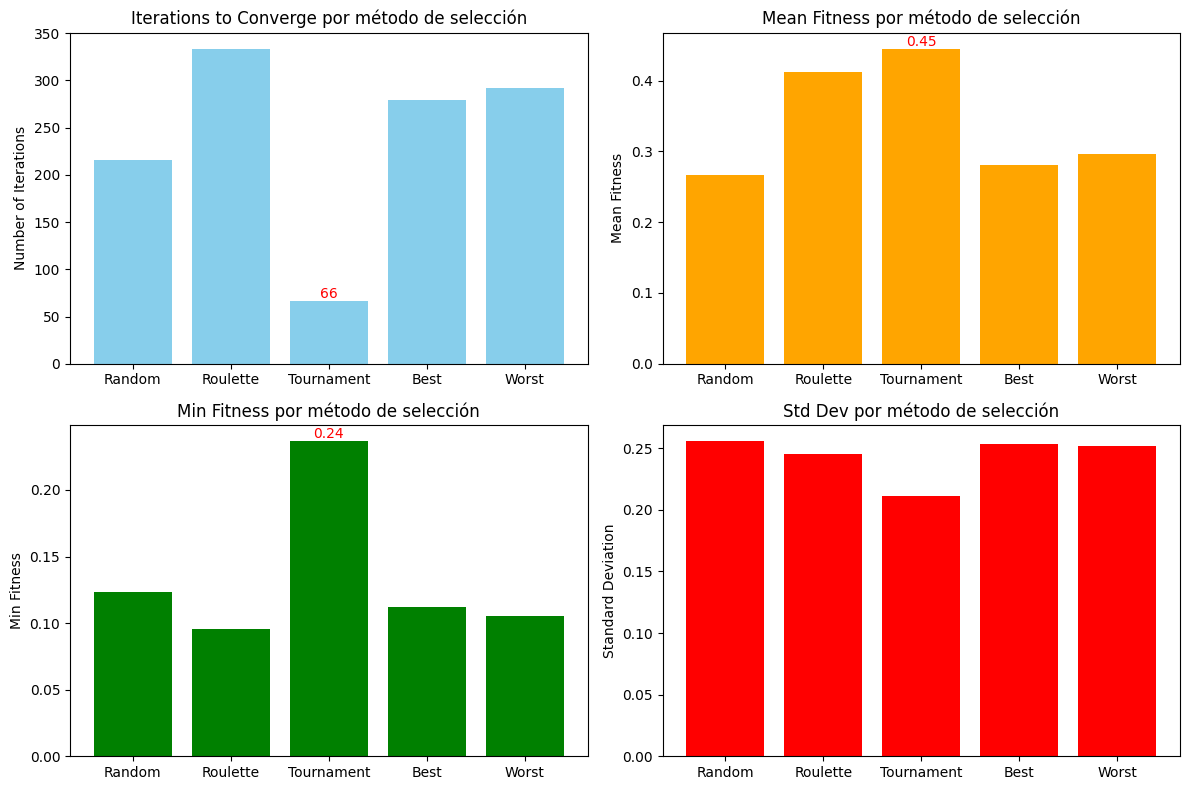

In [19]:
plot_selection_results(results)

# Optimización de parametros

In [20]:
def show_parameter_changes(
    x: np.ndarray,
    y: np.ndarray,
    function: Callable[[float, float], tuple[float, bool]],
    x_label: str,
    y_label: str
):
    X, Y = np.meshgrid(x, y)
    Z = np.zeros_like(X)
    failures = []

    for i in range(X.shape[0]):
        for j in range(X.shape[1]):
            iters, _, converged = function(X[i, j], Y[i, j])
            Z[i, j] = iters
            if not converged:
                failures.append((X[i, j], Y[i, j], iters))

    fig, axes = plt.subplots(
        1, 3,
        subplot_kw={'projection': '3d'},
        figsize=(18, 6),
        constrained_layout=True
    )

    view_angles = [
        (30, 45),
        (60, 120),
        (20, 200),
    ]

    zmin = np.min(Z)
    zmax = np.max(Z)

    red_dot_proxy = plt.Line2D([0], [0], linestyle="none", marker='o', color='red', label='No convergencia')

    for idx, (ax, (elev, azim)) in enumerate(zip(axes, view_angles), start=1):
        surf = ax.plot_surface(
            X, Y, Z,
            cmap='viridis',
            linewidth=0,
            antialiased=True,
            rcount=100,
            ccount=100,
            vmin=zmin,
            vmax=zmax
        )

        if failures:
            fx, fy, fz = zip(*failures)
            ax.scatter(
                fx, fy, fz,
                color='red',
                s=50,
                depthshade=True
            )

        ax.set_title(f'View {idx}: Elev={elev}, Azim={azim}', pad=10)
        ax.set_xlabel(x_label)
        ax.set_ylabel(y_label)
        ax.set_zlabel('Iteraciones')
        ax.set_zlim(zmin, zmax)
        ax.view_init(elev=elev, azim=azim)

    fig.colorbar(
        surf,
        ax=axes,
        shrink=0.6,
        aspect=20,
        pad=0.05,
        label='Iteraciones'
    )

    fig.legend(
        handles=[red_dot_proxy],
        loc='upper right',
        bbox_to_anchor=(1.02, 1.02),
        borderaxespad=0.0
    )

    plt.show()


## Probabilidad de Cruce y Mutación

Max: 0.50 | Avg: 0.21 | Min: 0.11: 100%|██████████| 2500/2500 [00:00<00:00, 12015.58it/s]
Max: 0.33 | Avg: 0.17 | Min: 0.09: 100%|██████████| 2500/2500 [00:00<00:00, 12014.22it/s]
Max: 0.33 | Avg: 0.19 | Min: 0.12: 100%|██████████| 2500/2500 [00:00<00:00, 11235.89it/s]
Max: 0.25 | Avg: 0.18 | Min: 0.10: 100%|██████████| 2500/2500 [00:00<00:00, 10029.45it/s]
Max: 0.50 | Avg: 0.21 | Min: 0.11: 100%|██████████| 2500/2500 [00:00<00:00, 9563.80it/s]
Max: 0.50 | Avg: 0.28 | Min: 0.17: 100%|██████████| 2500/2500 [00:00<00:00, 7593.56it/s]
Max: 0.50 | Avg: 0.29 | Min: 0.14: 100%|██████████| 2500/2500 [00:00<00:00, 8346.08it/s]
Max: 0.33 | Avg: 0.18 | Min: 0.08: 100%|██████████| 2500/2500 [00:00<00:00, 8808.76it/s]
Max: 0.25 | Avg: 0.16 | Min: 0.10: 100%|██████████| 2500/2500 [00:00<00:00, 7973.68it/s]
Max: 0.33 | Avg: 0.19 | Min: 0.08: 100%|██████████| 2500/2500 [00:00<00:00, 7978.08it/s]
Max: 0.25 | Avg: 0.15 | Min: 0.08: 100%|██████████| 2500/2500 [00:00<00:00, 7455.69it/s]
Max: 0.33 | Avg: 

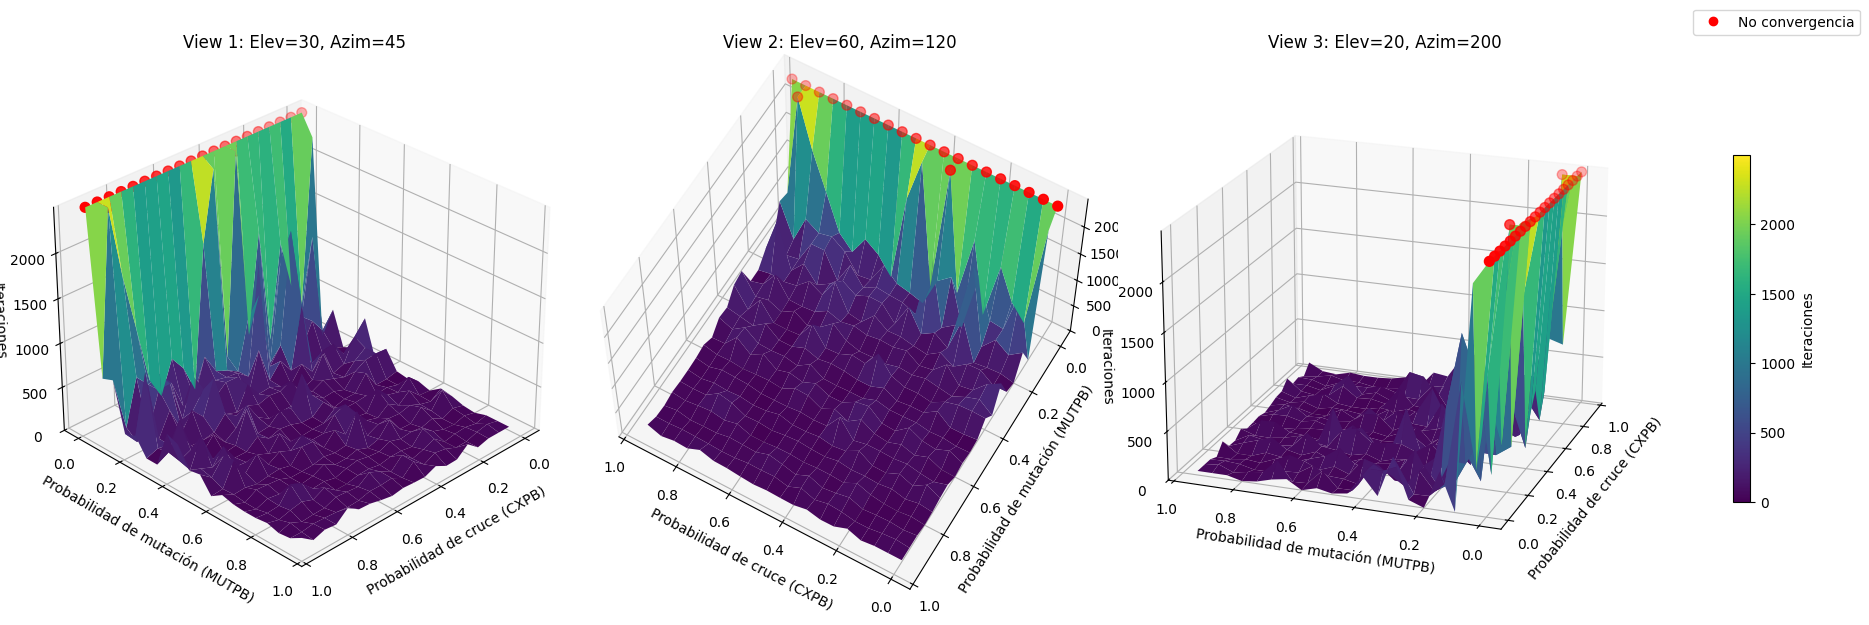

In [21]:
show_parameter_changes(
    np.arange(0.0, 1, 0.05),
    np.arange(0.0, 1, 0.05),
    lambda CXPB, MUTPB: execute_genetic_algorithm(toolbox, 10, 2500, CXPB, MUTPB),
    'Probabilidad de cruce (CXPB)',
    'Probabilidad de mutación (MUTPB)'
)

## Tamaño de la población y cantidad de iteraciones

Max: 1.00 | Avg: 0.28 | Min: 0.06:  29%|██▉       | 29/100 [00:00<00:00, 4307.49it/s]
Max: 0.50 | Avg: 0.21 | Min: 0.11: 100%|██████████| 100/100 [00:00<00:00, 3535.65it/s]
Max: 1.00 | Avg: 0.22 | Min: 0.08:  80%|████████  | 80/100 [00:00<00:00, 1928.09it/s]
Max: 1.00 | Avg: 0.21 | Min: 0.07:   6%|▌         | 6/100 [00:00<00:00, 2031.80it/s]
Max: 1.00 | Avg: 0.19 | Min: 0.07:   5%|▌         | 5/100 [00:00<00:00, 1372.21it/s]
Max: 1.00 | Avg: 0.20 | Min: 0.07:  11%|█         | 11/100 [00:00<00:00, 1161.18it/s]
Max: 1.00 | Avg: 0.20 | Min: 0.08:  40%|████      | 40/100 [00:00<00:00, 1122.70it/s]
Max: 1.00 | Avg: 0.22 | Min: 0.08:   1%|          | 1/100 [00:00<00:00, 577.09it/s]
Max: 1.00 | Avg: 0.21 | Min: 0.07:  11%|█         | 11/100 [00:00<00:00, 821.97it/s]
Max: 1.00 | Avg: 0.20 | Min: 0.06:   4%|▍         | 4/100 [00:00<00:00, 804.47it/s]
Max: 1.00 | Avg: 0.20 | Min: 0.07:   0%|          | 0/100 [00:00<?, ?it/s]
Max: 1.00 | Avg: 0.21 | Min: 0.05:  13%|█▎        | 13/100 [00:00<00:00

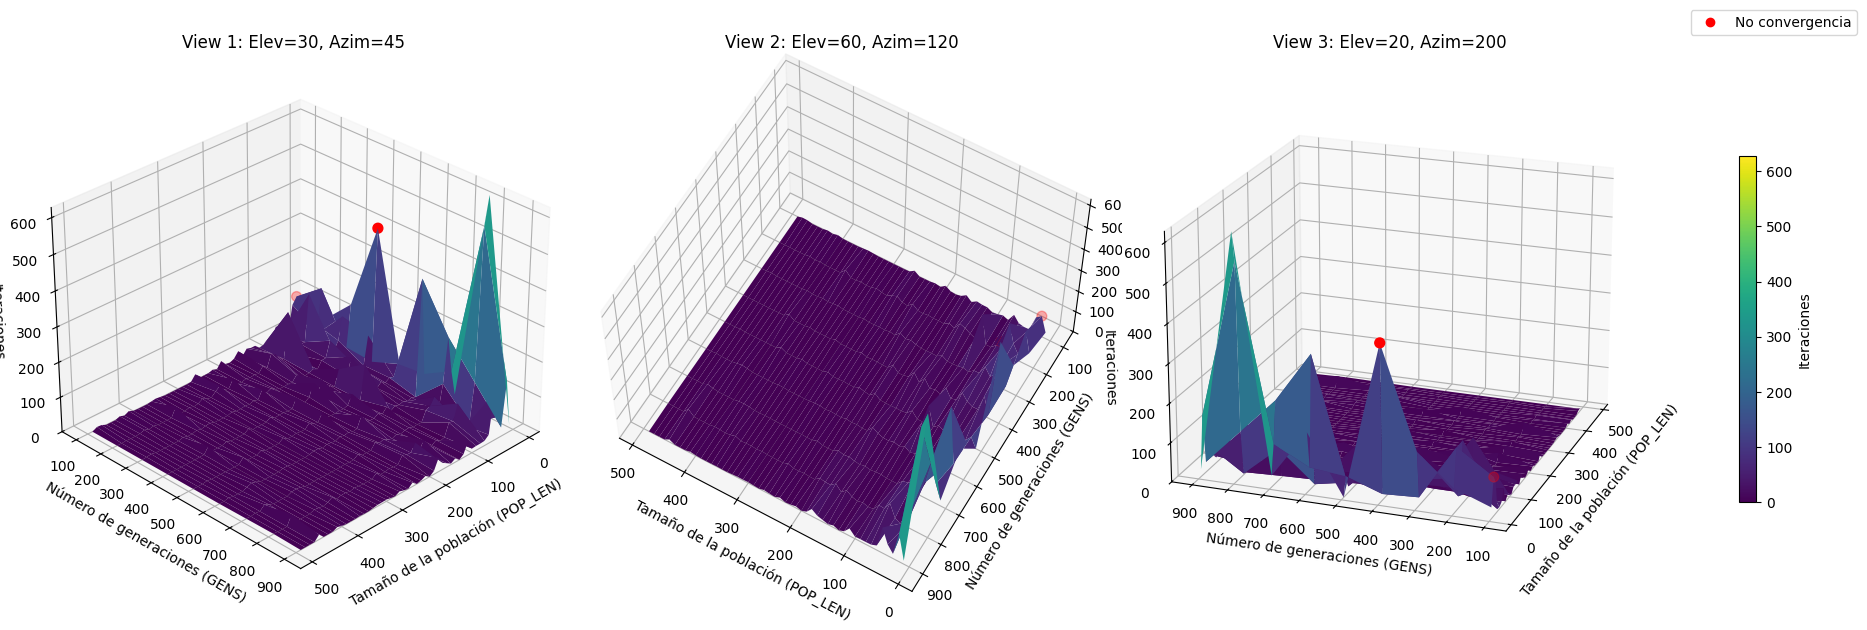

In [22]:
show_parameter_changes(
    np.arange(10, 500, 10),
    np.arange(100, 1000, 100),
    lambda POP_LEN, GENS: execute_genetic_algorithm(toolbox, POP_LEN, GENS, CXPB, MUTPB),
    'Tamaño de la población (POP_LEN)',
    'Número de generaciones (GENS)'
)